### Load libraries

In [2]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import datetime
%matplotlib inline 

### Load data

In [3]:
DATA_FOLDER = '../Data/'

sample_submission    = pd.read_csv(os.path.join(DATA_FOLDER, 'sample_submission.csv'))
test_identity        = pd.read_csv(os.path.join(DATA_FOLDER, 'test_identity.csv'))
test_transaction     = pd.read_csv(os.path.join(DATA_FOLDER, 'test_transaction.csv'))
train_identity       = pd.read_csv(os.path.join(DATA_FOLDER, 'train_identity.csv'))
train_transaction    = pd.read_csv(os.path.join(DATA_FOLDER, 'train_transaction.csv'))

### EDA

#### Train data

In [11]:
print("____ TRAIN IDENTITY ____")
print(train_identity.info())
print(train_identity.head())
#print(train_identity.dtypes)
print(train_identity.describe())

print("____ TRANSACTIONS ____")
print(train_transaction.info())
print(train_transaction.head())
#print(train_transaction.dtypes)
print(train_transaction.describe())

____ TRAIN IDENTITY ____
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144233 entries, 0 to 144232
Data columns (total 41 columns):
TransactionID    144233 non-null int64
id_01            144233 non-null float64
id_02            140872 non-null float64
id_03            66324 non-null float64
id_04            66324 non-null float64
id_05            136865 non-null float64
id_06            136865 non-null float64
id_07            5155 non-null float64
id_08            5155 non-null float64
id_09            74926 non-null float64
id_10            74926 non-null float64
id_11            140978 non-null float64
id_12            144233 non-null object
id_13            127320 non-null float64
id_14            80044 non-null float64
id_15            140985 non-null object
id_16            129340 non-null object
id_17            139369 non-null float64
id_18            45113 non-null float64
id_19            139318 non-null float64
id_20            139261 non-null float64
id_21            5

In [17]:
#check for missing values info
print("____ TRAIN IDENTITY ____")
print(train_identity.isnull().sum())

print("____ TRANSACTIONS ____")
print(train_transaction.isnull().sum())

____ TRAIN IDENTITY ____
TransactionID         0
id_01                 0
id_02              3361
id_03             77909
id_04             77909
id_05              7368
id_06              7368
id_07            139078
id_08            139078
id_09             69307
id_10             69307
id_11              3255
id_12                 0
id_13             16913
id_14             64189
id_15              3248
id_16             14893
id_17              4864
id_18             99120
id_19              4915
id_20              4972
id_21            139074
id_22            139064
id_23            139064
id_24            139486
id_25            139101
id_26            139070
id_27            139064
id_28              3255
id_29              3255
id_30             66668
id_31              3951
id_32             66647
id_33             70944
id_34             66428
id_35              3248
id_36              3248
id_37              3248
id_38              3248
DeviceType         3423
DeviceInfo     

In [41]:
train_tr_cat = ["ProductCD","card1","card2","card3","card4","card5","card6", "addr1", "addr2","P_emaildomain","R_emaildomain",
    "M1","M2","M3","M4","M5","M6","M7","M8","M9"]
print(tr_id_cat)
print("Categorical features transcation data = ", len(tr_id_cat))

train_id_cat = ["DeviceType","DeviceInfo"]
for i in range(12,39):
    x = "id_" + str(i)
    #print(x)
    train_id_cat.append(x)
print(train_id_cat)

print("Categorical features identity data = ", len(train_id_cat))

['ProductCD', 'card1', 'card2', 'card3', 'card4', 'card5', 'card6', 'addr1', 'addr2', 'P_emaildomain', 'R_emaildomain', 'M1', 'M2', 'M3', 'M4', 'M5', 'M6', 'M7', 'M8', 'M9']
Categorical features transcation data =  20
['DeviceType', 'DeviceInfo', 'id_12', 'id_13', 'id_14', 'id_15', 'id_16', 'id_17', 'id_18', 'id_19', 'id_20', 'id_21', 'id_22', 'id_23', 'id_24', 'id_25', 'id_26', 'id_27', 'id_28', 'id_29', 'id_30', 'id_31', 'id_32', 'id_33', 'id_34', 'id_35', 'id_36', 'id_37', 'id_38']
Categorical features identity data =  29


#### Test data

In [ ]:
print(test_identity.head())
print(test_identity.dtypes)
print(test_identity.describe())

#deleted a line here
print(test_transaction.dtypes)
print(test_transaction.describe())

0    569877
1     20663
Name: isFraud, dtype: int64


<BarContainer object of 2 artists>

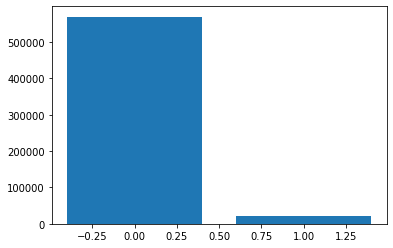

In [47]:
label_bar = train_transaction['isFraud'].value_counts()
print(label_bar)
plt.bar(label_hist.index, label_hist.values)
plt.scatter(label_hist.index, label_hist.values) #added a line here